# K-Means Clustering für Diamanten

K-Means ist ein iterativer Clustering-Algorithmus, der Daten in eine vordefinierte Anzahl von **k** Clustern unterteilt, indem er die Punkte basierend auf der Nähe zu den Clusterzentroiden gruppiert. Ziel ist es, die Summe der quadratischen Abstände zwischen den Punkten und ihren Zentroiden zu minimieren.


In [ ]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

In [6]:
# Daten laden und vorbereiten
# Daten laden
silent = True
%run ../dataLoadAndPrepare.ipynb

print("Features vor dem One-Hot-Encoding:")
display(df.head())  

# Kategorische Features für das One-Hot-Encoding
categorical_features = ['cut', 'color', 'clarity']

# One-Hot-Encoding anwenden
# Beispiel
#Fair →         [1, 0, 0, 0, 0]
#Good →         [0, 1, 0, 0, 0]
#Very Good →    [0, 0, 1, 0, 0]
#Premium →      [0, 0, 0, 1, 0]
#Ideal →        [0, 0, 0, 0, 1]

encoder = OneHotEncoder(drop='first', sparse_output=False)  
encoded_cats = encoder.fit_transform(df[categorical_features])

# Umwandeln der kodierten Daten in einen DataFrame
encoded_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_features))
# Kombinieren des ursprünglichen DataFrames mit den kodierten Werten
df_encoded = pd.concat([df, encoded_df], axis=1)

# Entfernen der ursprünglichen kategorischen Spalten
df_encoded.drop(columns=categorical_features, inplace=True)

# Wichtige numerische Features für das Clustering

#Wenn man nur bestimmte Features für das Clustering verwenden möchte
#features = ['carat', 'price', 'x', 'y', 'z', 'depth']  
#df_cluster = df_encoded[features]

print("Für das Clustering werden alle numerischen Features verwendet")
df_cluster = df_encoded.copy()

# Features für das Clustering
display(df_cluster.head())


Features vor dem One-Hot-Encoding:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Für das Clustering werden alle numerischen Features verwendet


,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


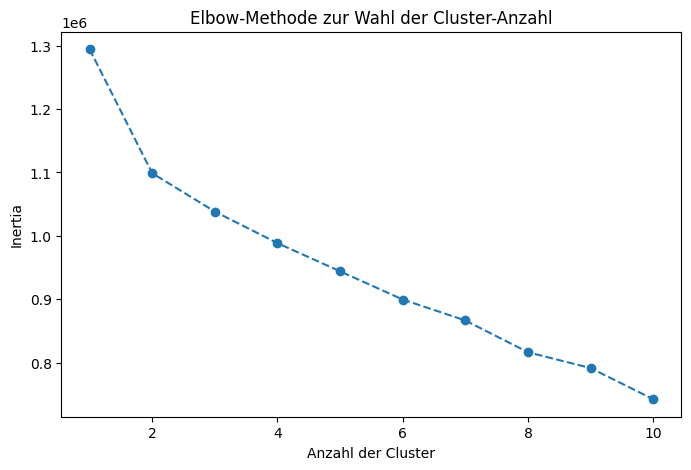

In [8]:
#Bestimmung der Anzahl der Cluster
# Elbow-Methode

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

inertia = []
cluster_range = range(1, 11)  # Testen von 1 bis 10 Clustern

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    
# Plot der Inertia-Werte
plt.figure(figsize=(8,5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel('Anzahl der Cluster')
plt.ylabel('Inertia')
plt.title('Elbow-Methode zur Wahl der Cluster-Anzahl')
plt.show()

# Vor k = 2 nimmt die Inertia sehr stark ab.
# Nach k = 3 wird die Reduktion kleiner, d. h., zusätzliche Cluster verbessern die Clustering-Qualität nicht mehr so stark.

Cluster-Zentren:
 [[ 1.01687725e+00  5.16797204e-02  2.23430501e-01  9.38433991e-01
   1.04082680e+00  1.01525814e+00  1.02407948e+00  7.12470030e-02
  -2.30632666e-01  1.54691885e-01  1.48854347e-02 -1.74875591e-01
  -5.29379584e-02 -3.93965685e-04  1.36152310e-01  1.38953074e-01
   1.56677302e-01 -1.15354064e-01  6.10619432e-02  3.20915661e-01
  -8.27803336e-02 -4.99457010e-02 -1.85254044e-01 -1.42201908e-01]
 [-6.43102413e-01 -4.41063518e-02  3.88922773e-01 -6.18375944e-01
  -6.57875738e-01 -6.46190696e-01 -6.51544510e-01  1.96132779e-01
  -8.15469755e-01  3.38400748e-01  4.68072446e-01  1.43042488e-01
   3.95822098e-02 -2.09265046e-02 -8.93835438e-02 -9.77314057e-02
  -8.67370190e-02 -5.27850007e-02  6.12516981e-02 -1.63086375e-01
   4.40624963e-02  1.92390130e-02  4.87632806e-02  4.81142516e-02]
 [-6.88459105e-01 -2.23886360e-02 -7.36159989e-01 -6.07901812e-01
  -7.05085243e-01 -6.82826706e-01 -6.89047299e-01 -3.14293556e-01
   1.21658228e+00 -5.85937077e-01 -5.36790705e-01  8.260

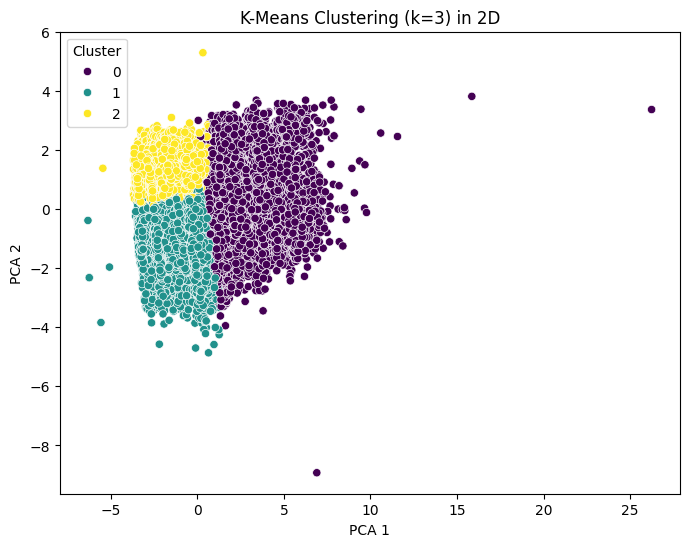

In [ ]:
#Visualisierung der Cluster
# K-Means Clustering mit k = 3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(df_scaled)

# Cluster-Zentren anzeigen
print("Cluster-Zentren:\n", kmeans.cluster_centers_)

# Cluster-Anzahl überprüfen
print(df_cluster['Cluster'].value_counts())


# PCA für 2D-Visualisierung
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Scatterplot der Cluster
print("2D-Visualisierung der Cluster:")
print("PCA 1 (erste Hauptkomponente) → Die Richtung mit der größten Varianz in den Daten")
print("PCA 2 (zweite Hauptkomponente) → Die Richtung mit der zweitgrößten Varianz")
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=df_cluster['Cluster'], palette='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-Means Clustering (k=3) in 2D')
plt.legend(title="Cluster")
plt.show()


sns.pairplot(df_cluster, hue='Cluster', palette='viridis')
plt.suptitle("Paarweise Merkmalsvergleiche mit Cluster-Farben", y=1.02)
plt.show()